# Farm Household Models

### The Chayanovian Household

A self-sufficient farm household $i$ with land and labor endowment $(\bar T_i, \bar L_i )$ is completely cut off from product and factor markets.  It allocates labor maximizes utility over consumption and leisure

$$\max_{c_i,l_i} U(c_i,l_i)$$

subject to the constraints that consumption $c_i$ not exceed output and the sum of hours in production $L_i$ plus hours in leisure $l_i$ not exceed the household's labor endowment $\bar L_i$

$$c_i \leq F(\bar T_i, L_i) $$
$$L_i + l_i \leq \bar L_i$$

Substituting the constraints into the objective reduces the problem to one of choosing the right allocation of labor to production:

$$\max_{L_i} U(F(\bar T_i, L_i),\bar L_i - L_i)$$

From the first order necessary conditions we obtain

$$U_c \cdot F_L = U_l$$

which states that the farm household should allocated labor to farm production up to the point where the marginal utility benefit of additional consumption $U_c \cdot F_L$ equals the opportunity cost of leisure.   

It will be useful to draw things in leisure-consumption space.  Leisure is measured on the horizontal from left to right which then means that labor $L$ allocated to production can be measured from right to left with an origin starting at the endowment point $\bar L_i$

To fix ideas with a concrete example assume farm household $i$ has Cobb-Douglas preferences over consumption and leisure:
$$U(c,l) = c^\beta l^{1-\beta}$$

and its production technology is a simple constant returns to scale Cobb-Douglas production function of the form:

$$F(\bar T_i,L_i)=\bar T_i^\alpha L_i^{1-\alpha}$$

The marginal product of labor $F_L$ which the literature frequently refers to as the shadow price of labor will be given by:

$$F_L (\bar T_i,L_i) = (1-\alpha) \left [ {\frac{\bar T_i}{L_i}} \right ]^\alpha$$

The first order necessary condition can therefore be solved for and for these Cobb-Douglas forms we get a rather simple and tidy solution to the optimal choice of leisure

$$l^* = \frac{a \cdot \bar L}{1+a} $$  

where $a=\frac{1-\beta}{\beta \cdot (1-\alpha)}$

### Graphical analysis
(Note: formulas and plots work for default parameters but not checked for other values.)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

In [2]:
ALPHA = 0.5
BETA = 0.5
TBAR = 100
LBAR = 100

def F(T,L,alpha=ALPHA):
    return (T**alpha)*(L**(1-alpha))

def FL(T,L,alpha=ALPHA):
    """Shadow price of labor"""
    return (1-alpha)*F(T,L,alpha=ALPHA)/L

def U(c, l, beta=BETA):
    return (c**beta)*(l**(1-beta))

def indif(c, ubar, beta=BETA):
    return (ubar/(c**beta))**(1/(1-beta))

def leisure(Lbar,alpha=ALPHA, beta=BETA):
    a = (1-beta)/((1-alpha)*beta)
    return a*Lbar/(1+a)

def HH(Tbar,Lbar,alpha=ALPHA, beta=BETA):
    """Household optimum leisure, consumption and utility"""
    a = (1-beta)/((1-alpha)*beta)
    leisure = a*Lbar/(1+a)
    output = F(Tbar,Lbar-leisure)
    utility = U(output, leisure)
    return leisure, output, utility 

In [3]:
def chayanov(Tbar,Lbar):
    leis = np.linspace(0.1,Lbar,num=100)
    q = F(Tbar,Lbar-leis)
    l_opt, Q, U = HH(Tbar, Lbar)
    print("Leisure, Consumption, Utility =({:5.2f},{:5.2f},{:5.2f})"
          .format(l_opt, Q, U))
    c = indif(leis,U)
    fig, ax = plt.subplots(figsize=(8,8))
    ax.plot(leis, q, lw=2.5)
    ax.plot(leis, c, lw=2.5)
    ax.plot(l_opt,Q,'ob')
    ax.vlines(l_opt,0,Q, linestyles="dashed")
    ax.hlines(Q,0,l_opt, linestyles="dashed")
    ax.set_xlim(0, 110)
    ax.set_ylim(0, 150)
    ax.set_xlabel(r'$l - leisure$', fontsize=16)
    ax.set_ylabel('$c - consumption$', fontsize=16)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid()
    ax.set_title("Chayanovian Household Optimum")
    plt.show()

Leisure, Consumption, Utility =(66.67,57.74,62.04)


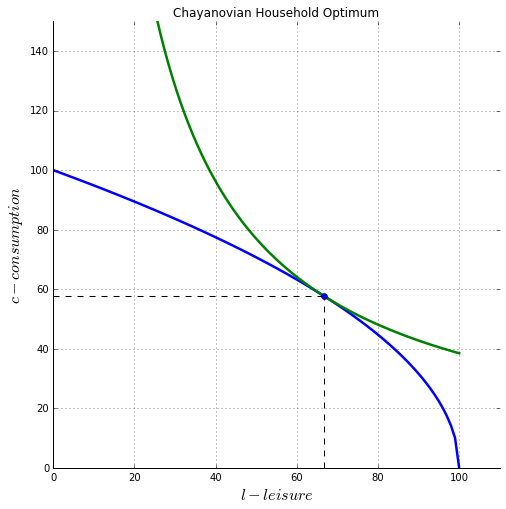

In [4]:
chayanov(TBAR,LBAR)

### Inverse farm size productivity relationship
In this non-separable household with no market for land or labor, each household farms as much land as it owns. We find the well-known inverse farm size-productivity relationship: output per hectare is higher on smaller farms.  Households with larger farms enjoy higher marginal products of labor -- a higher shadow price of labor.

These two relationships can be seen below on this two-axis plot.

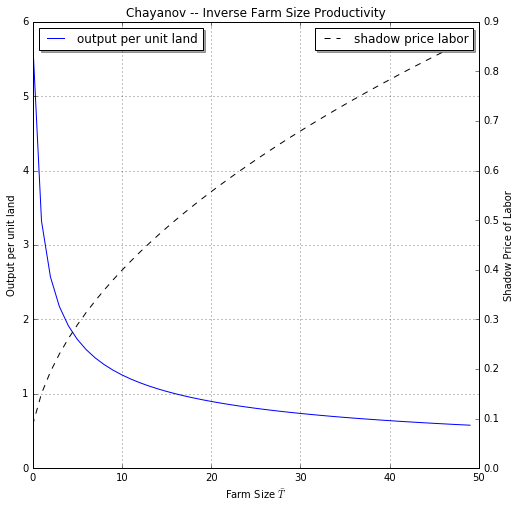

In [5]:
Tb = np.linspace(1,LBAR)
le, q, _ = HH(Tb,LBAR)
fig, ax1 = plt.subplots(figsize=(8,8))
ax1.plot(q/Tb,label='output per unit land')
ax1.set_title("Chayanov -- Inverse Farm Size Productivity")
ax1.set_xlabel('Farm Size '+r'$\bar T$')
ax1.set_ylabel('Output per unit land')
ax1.grid()
ax2 = ax1.twinx()
ax2.plot(FL(Tb,LBAR-le),'k--',label='shadow price labor')
ax2.set_ylabel('Shadow Price of Labor')
legend = ax1.legend(loc='upper left', shadow=True)
legend = ax2.legend(loc='upper right', shadow=True)
plt.show()

If you are running this notebook in interactive mode you can play with the sliders:

Leisure, Consumption, Utility =(41.33,50.83,45.83)


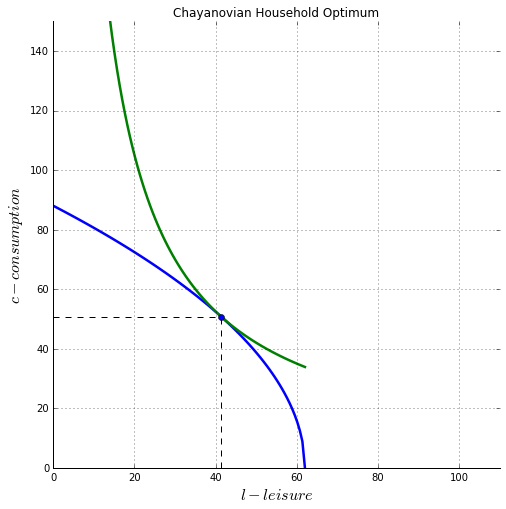

<function __main__.chayanov>

In [6]:
interact(chayanov,Tbar=(50,200,1),Lbar=(24,100,1))

## The Separable Farm Household
(incomplete)

#### Production, shadow prices and labor demand

Assume now that rather than being in autarky in product and factor markets, the farm household can buy or sell output at constant competitive market price $p$ and sell or hire labor at market wage $w$.  Hired labor and own household labor are assumed to be perfect substitutes.

To keep the analysis a little bit simpler assume that the market for land leases remains closed. For a linear homogenous production function this will not matter for allocative efficiency. 

Acting as a production enterprise, the farm household maximizes farm profits when:
$$F_L (\bar T_i,L) = w$$

In the case of Cobb-Douglas production optimal labor demand is given by:

$$ L^D(w;\bar T_i) = \bar T_i \cdot \left [ {\frac{1-\alpha}{w}} \right ]^\frac{1}{\alpha}$$
